In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
CircuitPath = '/home/fernando/Documents/SCx_model/O1_data_physiology/'

Atlas = CircuitPath + 'atlas/'

MorphologyPath = CircuitPath + 'morphologies/ascii/'

nrnPath = CircuitPath + 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical/edges.h5'

CellLibraryFile = CircuitPath + 'S1nonbarrel_neurons/nodes.h5'

METypePath = CircuitPath + 'emodels_hoc/'


# Path = CircuitPath + 'sonata/edges/edges_hippocampus_projections.h5'

lst_properties = [ 'etype', 'exc_mini_frequency', 'inh_mini_frequency', 'layer', 'me_combo', 'model_template', 'model_type', 'morph_class', 'morphology', 'mtype', 
                  'orientation_w', 'orientation_x', 'orientation_y', 'orientation_z', 'population', 'region', 'synapse_class', '@dynamics:holding_current', 
                  '@dynamics:input_resistance', '@dynamics:resting_potential', '@dynamics:threshold_current', 'x', 'y', 'z']

In [3]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import json

from bluepysnap import Circuit
from bluepysnap.bbp import Cell

circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)

In [4]:
print(circuit.nodes.population_names)
print()
print(circuit.edges.population_names)


['POm', 'S1nonbarrel_neurons', 'VPM', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical']

['POm__S1nonbarrel_neurons__chemical', 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'VPM__S1nonbarrel_neurons__chemical', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical', 'midrange__S1nonbarrel_neurons__chemical']


In [5]:
f = open('node_sets.json') 
node_sets = json.load(f) 
   
print(node_sets.keys())
print(len(node_sets['hex2']['node_id']))

dict_keys(['Layer2Excitatory', 'Layer3Excitatory', 'Layer23Excitatory', 'Layer4Excitatory', 'Layer5Excitatory', 'Layer6Excitatory', 'Layer2346Excitatory', 'Layer1Inhibitory', 'Layer23Inhibitory', 'Layer4Inhibitory', 'Layer5Inhibitory', 'Layer6Inhibitory', 'hex0', 'hex1', 'hex2', 'hex3', 'hex4', 'hex5', 'hex6', 'hex_O1', 'proj_Thalamocortical_VPM_Source', 'proj_Thalamocortical_POM_Source', 'Mosaic', 'All', 'Excitatory', 'Inhibitory', 'L1_DAC', 'L1_HAC', 'L1_LAC', 'L1_NGC-DA', 'L1_NGC-SA', 'L1_SAC', 'L23_BP', 'L23_BTC', 'L23_CHC', 'L23_DBC', 'L23_LBC', 'L23_MC', 'L23_NBC', 'L23_NGC', 'L23_SBC', 'L2_IPC', 'L2_TPC:A', 'L2_TPC:B', 'L3_TPC:A', 'L3_TPC:C', 'L4_BP', 'L4_BTC', 'L4_CHC', 'L4_DBC', 'L4_LBC', 'L4_MC', 'L4_NBC', 'L4_NGC', 'L4_SBC', 'L4_SSC', 'L4_TPC', 'L4_UPC', 'L5_BP', 'L5_BTC', 'L5_CHC', 'L5_DBC', 'L5_LBC', 'L5_MC', 'L5_NBC', 'L5_NGC', 'L5_SBC', 'L5_TPC:A', 'L5_TPC:B', 'L5_TPC:C', 'L5_UPC', 'L6_BP', 'L6_BPC', 'L6_BTC', 'L6_CHC', 'L6_DBC', 'L6_HPC', 'L6_IPC', 'L6_LBC', 'L6_MC', 'L

In [6]:
cells = circuit.nodes["S1nonbarrel_neurons"]

conn = circuit.edges["S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]

In [7]:
# connsinfo = conn.get()

## Cells info

In [8]:
nodesinfo = cells.get()
nodesinfo

,etype,exc_mini_frequency,inh_mini_frequency,layer,me_combo,model_template,model_type,morph_class,morphology,mtype,...,population,region,synapse_class,x,y,z,@dynamics:holding_current,@dynamics:input_resistance,@dynamics:resting_potential,@dynamics:threshold_current
node_ids,,,,,,,,,,,,,,,,,,,,,
0,bNAC,0.010108,0.233243,1,bNAC_L23SBC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23SBC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,4652.171846,-1930.525524,-1836.395782,-0.063857,163.571762,-74.320229,0.114051
1,cNAC,0.010108,0.233243,1,cNAC_L23NGC_L1_DAC_1_C270106A_-_Scale_x1.000_y...,hoc:cNAC_L23NGC,biophysical,INT,C270106A_-_Scale_x1.000_y1.025_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1J,INH,4977.735899,-1641.041348,-2140.579908,-0.056414,192.304916,-73.626152,0.083738
2,bNAC,0.010108,0.233243,1,bNAC_L23NGC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23NGC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,L1_DAC,...,S1nonbarrel_neurons,S1J,INH,5011.718764,-1565.779688,-2212.599874,-0.059054,169.438538,-72.886154,0.084117
3,cNAC,0.010108,0.233243,1,cNAC_L6NGC_L1_DAC_1_sm090918b1-3_idB_-_Scale_x...,hoc:cNAC_L6NGC,biophysical,INT,sm090918b1-3_idB_-_Scale_x1.000_y0.950_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,4266.789018,-1804.711830,-1531.716011,-0.100206,100.864609,-74.003380,0.157909
4,bNAC,0.010108,0.233243,1,bNAC_L23NGC_L1_DAC_1_C270106C_-_Scale_x1.000_y...,hoc:bNAC_L23NGC,biophysical,INT,C270106C_-_Scale_x1.000_y0.975_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,4779.539653,-1259.558916,-1996.720501,-0.040889,247.846909,-72.796501,0.052005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211707,bNAC,0.010108,0.233243,5,bNAC_L23NGC_L5_BP_5_C240300C1_-_Scale_x1.000_y...,hoc:bNAC_L23NGC,biophysical,INT,C240300C1_-_Scale_x1.000_y0.975_z1.000_-_Clone_1,L5_BP,...,S1nonbarrel_neurons,S1FL,INH,4053.191307,-663.722760,-2140.027223,-0.043246,259.866028,-71.974144,0.048974
211708,dSTUT,0.010108,0.233243,5,dSTUT_L5BP_L5_BP_5_C240300C1_-_Clone_0,hoc:dSTUT_L5BP,biophysical,INT,C240300C1_-_Clone_0,L5_BP,...,S1nonbarrel_neurons,S1FL,INH,4002.636889,-1382.419711,-2641.743271,-0.072633,66.215591,-76.741768,0.182784
211709,bNAC,0.010108,0.233243,5,bNAC_L23NGC_L5_BP_5_rp110127_L5-2_idC_-_Scale_...,hoc:bNAC_L23NGC,biophysical,INT,rp110127_L5-2_idC_-_Scale_x1.000_y1.025_z1.000,L5_BP,...,S1nonbarrel_neurons,S1FL,INH,4228.866737,-909.053724,-2608.261691,-0.023842,405.003632,-73.244141,0.032160


In [9]:
mtypes = cells.property_values(Cell.MTYPE)

In [10]:
mtypes = list(mtypes)

In [11]:
i = 0
mntypes = {}
for mn in sorted(mtypes):
    mntypes[mn] = i
    i+=1

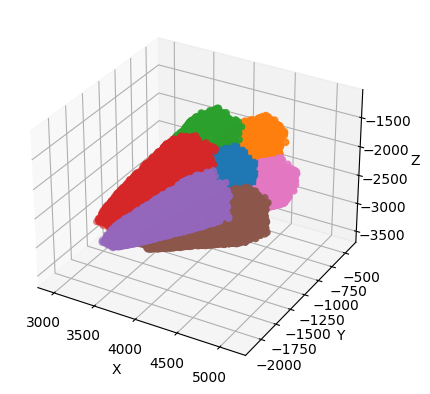

In [98]:
# %matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, morpho in [('s', 'hex0'),  ('o', 'hex1'),  ('o', 'hex2'),('o', 'hex3'),  ('o', 'hex4'),  ('o', 'hex5'),('o', 'hex6')]:
    
    nodeprex = []
    nodeprez = []       
    nodeprey = [] 
    nodeprew = [] 
    nodepremtype = []    
    for gid in node_sets[morpho]['node_id']: 
        if nodesinfo['region'][gid]!='xS1FL':  
            if 'L' in nodesinfo['mtype'][gid]:     
                nodeprex.append(nodesinfo['x'][gid])
                nodeprey.append(nodesinfo['y'][gid])
                nodeprez.append(nodesinfo['z'][gid])
                nodeprew.append(nodesinfo['orientation_w'][gid])
                nodepremtype.append(mntypes[nodesinfo['mtype'][gid]])
    

    ax.scatter(nodeprex, nodeprey, nodeprez, marker=m)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [13]:
nodeprex = []
nodeprez = []       
nodeprey = [] 
nodepremtype = []    
for gid in node_sets['hex0']['node_id']:
    if 'L' in nodesinfo['mtype'][gid]:    
        nodeprex.append(nodesinfo['x'][gid])
        nodeprey.append(nodesinfo['y'][gid])
        nodeprez.append(nodesinfo['z'][gid])
        nodepremtype.append(mntypes[nodesinfo['mtype'][gid]])


In [14]:
print(np.mean(nodeprex),np.mean(nodeprey),np.mean(nodeprez))

3942.8243701921465 -1247.624833014761 -2463.3882640928678


In [15]:
nodeprex = []
nodeprez = []       
nodeprey = [] 
nodepremtype = []    
for gid in node_sets['hex0']['node_id']:
    if 'L6' in nodesinfo['mtype'][gid]:    
        nodeprex.append(nodesinfo['x'][gid])
        nodeprey.append(nodesinfo['y'][gid])
        nodeprez.append(nodesinfo['z'][gid])
        nodepremtype.append(mntypes[nodesinfo['mtype'][gid]])

In [16]:
print(np.mean(nodeprex),np.mean(nodeprey),np.mean(nodeprez))

3560.8979394929374 -1153.0125370542862 -2960.494375047068


In [17]:
x0, y0, z0 = 3942.8243701921465,-1247.624833014761, -2463.3882640928678
x0, y0, z0

(3942.8243701921465, -1247.624833014761, -2463.3882640928678)

In [18]:
vx, vy, vz = 3942.8243701921465-3560.8979394929374,-1247.624833014761-(-1153.0125370542862), -2463.3882640928678-(-2960.494375047068)
vx, vy, vz

(381.92643069920905, -94.61229596047474, 497.1061109542002)

In [19]:
t = -2
xt, yt, zt = x0 + vx*t, y0+ vy*t, z0+ vz*t
xt, yt, zt

(3178.9715087937284, -1058.4002410938115, -3457.600486001268)

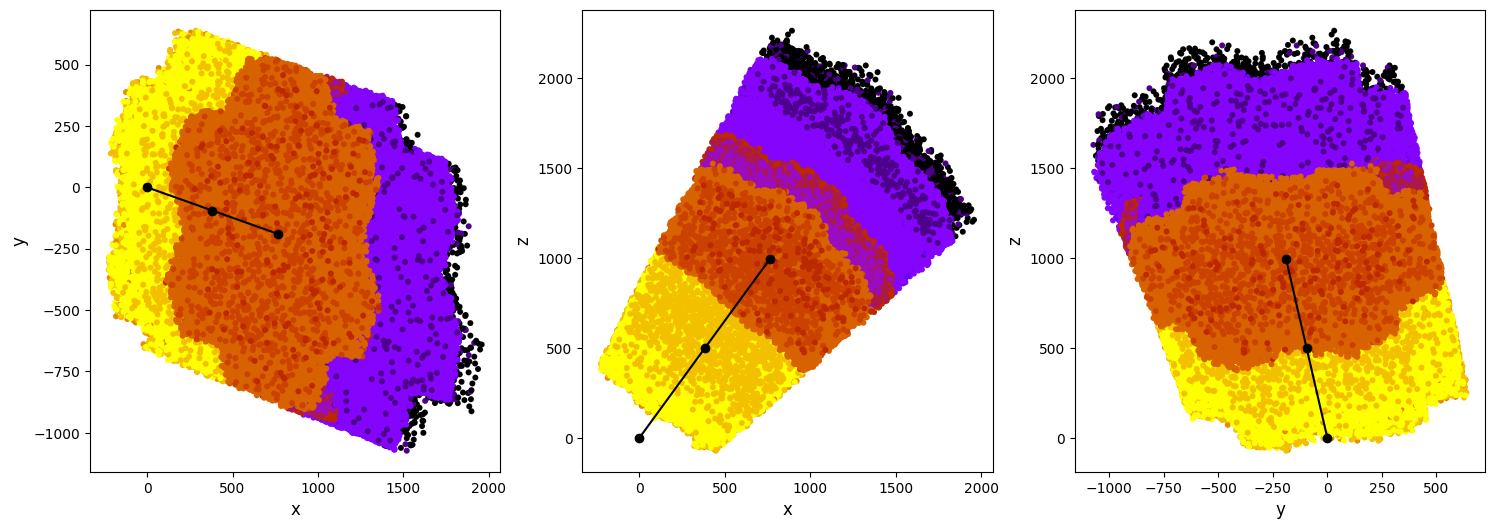

In [20]:
# plot the results
fig=plt.figure(figsize=(18,6))

for ii,reg in enumerate(['xS1FL']):
    
    nodeprex = []
    nodeprez = []       
    nodeprey = [] 
    nodepremtype = []    
    for gid in range(211712):
        if nodesinfo['region'][gid]!=reg:  
            nodeprex.append(nodesinfo['x'][gid]-xt)
            nodeprey.append(nodesinfo['y'][gid]-yt)
            nodeprez.append(nodesinfo['z'][gid]-zt)
#             nodepremtype.append(nodesinfo['orientation_y'][gid])
            nodepremtype.append(mntypes[nodesinfo['mtype'][gid]])

    plt.subplot(1,3,1)
    plt.scatter(nodeprex,nodeprey, lw=0.05, s=18,
                c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 12))
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.plot([3942.8243701921465-xt,3560.8979394929374-xt,xt-xt],[-1247.624833014761-yt,-1153.0125370542862-yt,yt-yt],'-ok')


    plt.subplot(1,3,2)
    plt.scatter(nodeprex,nodeprez, lw=0.05, s=18,
                c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 12))
    plt.xlabel('x', fontsize=12)
    plt.ylabel('z', fontsize=12)
    plt.plot([3942.8243701921465-xt,3560.8979394929374-xt,xt-xt],[-2463.3882640928678-zt,-2960.494375047068-zt,zt-zt],'-ok')


    plt.subplot(1,3,3)
    plt.scatter(nodeprey,nodeprez, lw=0.05, s=18,
                c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 12))
    plt.xlabel('y', fontsize=12)
    plt.ylabel('z', fontsize=12)
    plt.plot([-1247.624833014761-yt,-1153.0125370542862-yt,yt-yt],[-2463.3882640928678-zt,-2960.494375047068-zt,zt-zt],'-ok')

In [21]:
x0, y0, z0 = x0-xt, y0-yt, z0-zt
x0, y0, z0

(763.8528613984181, -189.22459192094948, 994.2122219084004)

In [22]:
from numpy import cross, eye, dot
from scipy.linalg import expm, norm

def M(axis, theta):
    return expm(cross(eye(3), axis/norm(axis)*theta))

In [23]:
gid = 0
nodeprex[gid], nodeprey[gid], nodeprez[gid]

(1473.2003374115166, -872.1252832729147, 1621.2047036336817)

In [24]:
len(nodeprex)

211712

In [61]:
nodeprex_new = []
nodeprez_new = []       
nodeprey_new = [] 
nodepremtype_new = []    

for gid in range(len(nodeprex)):
    
    x0, y0, z0 = nodeprex[gid], nodeprey[gid], nodeprez[gid]

    v, axis, theta = [x0, y0, z0], [0, 0, 1], 1.813631
    M0 = M(axis, theta)
    vn = dot(M0,v)
    
    x10, y10, z10 = vn
    
    v1, axis, theta = [x10, y10, z10], [1, 0, 0], 0.66955
    M0 = M(axis, theta)

    vn1 = dot(M0,v1)
    
    nodeprex_new.append(vn1[0])
    nodeprey_new.append(vn1[1])
    nodeprez_new.append(vn1[2])
    nodepremtype_new.append(nodepremtype[gid])


In [66]:
nodeprehex_new = {}

for msyn, morpho in [('s', 'hex0'),  ('o', 'hex1'),  ('o', 'hex2'),('o', 'hex3'),  ('o', 'hex4'),  ('o', 'hex5'), ('o', 'hex6')]:
    for gid in node_sets[morpho]['node_id']:
        nodeprehex_new[gid] = int(morpho[-1])

In [68]:
hexagon = []
for gid in range(len(nodeprex)):
    hexagon.append(nodeprehex_new[gid])

In [85]:
values, counts = np.unique(hexagon, return_counts=True)
values, counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([30190, 29738, 31338, 29892, 30249, 29861, 30444]))

In [86]:
minx, miny, minz = min(nodeprex_new), min(nodeprey_new), min(nodeprez_new)
minx, miny, minz

(-694.0434287091146, -777.0942752564185, 172.31838683268197)

Text(0, 0.5, 'z')

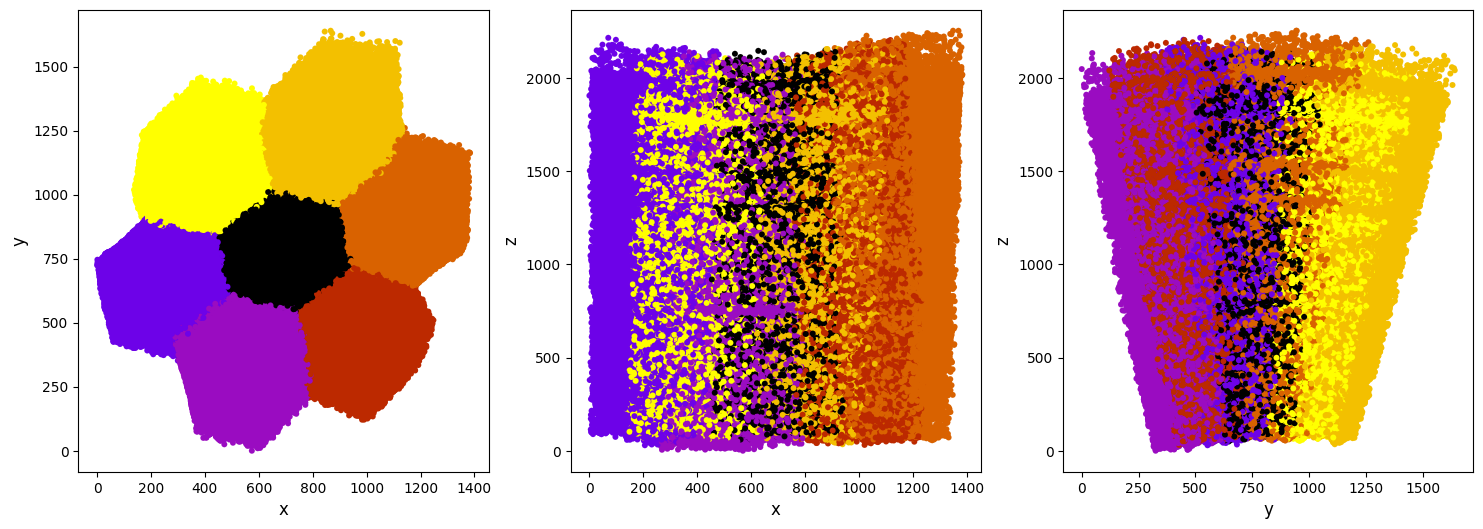

In [88]:
# plot the results
fig=plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.scatter(nodeprex_new-minx,nodeprey_new-miny, lw=0.05, s=18,
            c=hexagon, cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)


plt.subplot(1,3,2)
plt.scatter(nodeprex_new-minx,nodeprez_new-minz, lw=0.05, s=18,
            c=hexagon, cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('x', fontsize=12)
plt.ylabel('z', fontsize=12)


plt.subplot(1,3,3)
plt.scatter(nodeprey_new-miny,nodeprez_new-minz, lw=0.05, s=18,
            c=hexagon, cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('y', fontsize=12)
plt.ylabel('z', fontsize=12)

Text(0, 0.5, 'z')

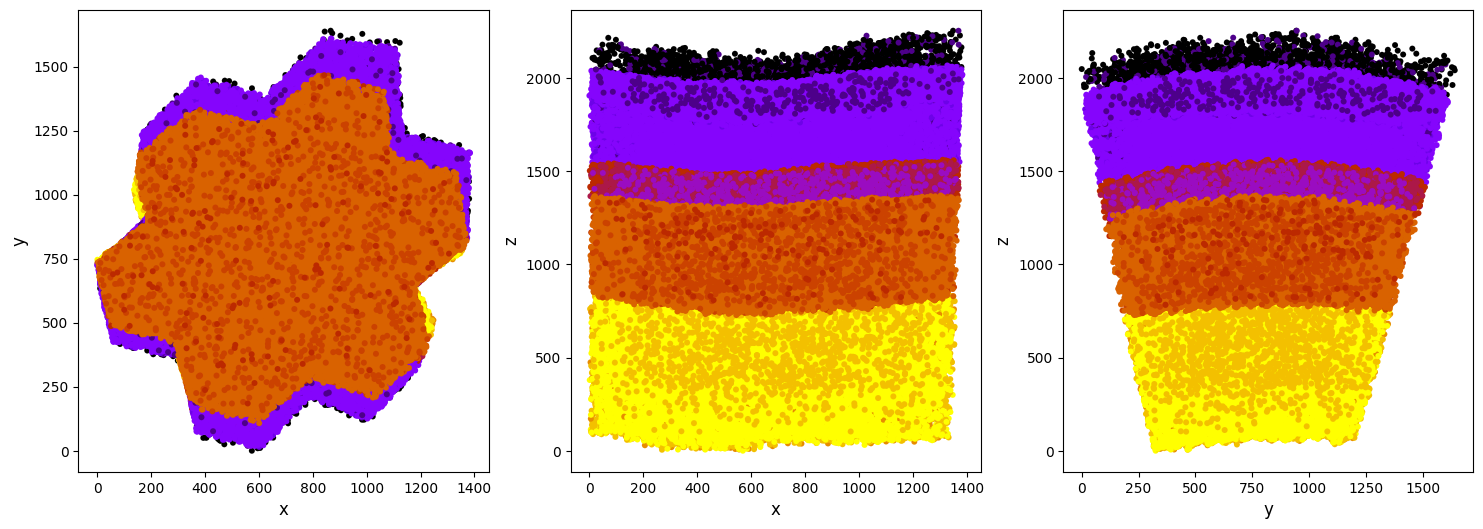

In [87]:
# plot the results
fig=plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.scatter(nodeprex_new-minx,nodeprey_new-miny, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)


plt.subplot(1,3,2)
plt.scatter(nodeprex_new-minx,nodeprez_new-minz, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('x', fontsize=12)
plt.ylabel('z', fontsize=12)


plt.subplot(1,3,3)
plt.scatter(nodeprey_new-miny,nodeprez_new-minz, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('y', fontsize=12)
plt.ylabel('z', fontsize=12)

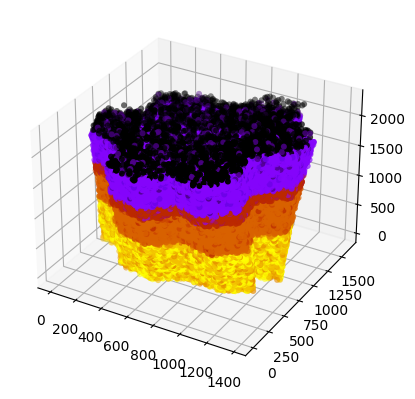

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(nodeprex_new-minx,nodeprey_new-miny,nodeprez_new-minz, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 12))

In [30]:
x_new, y_new, z_new = nodeprex_new-minx, nodeprey_new-miny,nodeprez_new-minz

In [89]:
nodes_new = pd.DataFrame({'x_new': list(x_new), 'y_new': list(y_new), 'z_new': list(z_new), 'hexagon': hexagon}, index=list(range(len(x_new))))  
# nodes_new.to_hdf('nodes_new.h5', key='nodes_new', mode='w')  

In [90]:
nodes_new.keys()

Index(['x_new', 'y_new', 'z_new', 'hexagon'], dtype='object')

In [91]:
nodes_new['x_new']

0         1186.342262
1          827.067939
2          745.843084
3         1156.887172
4          504.435398
             ...     
211707     100.735078
211708     810.501717
211709     296.626043
211710    1239.094382
211711     332.358098
Name: x_new, Length: 211712, dtype: float64

In [92]:
nodesinfo['x']

node_ids
0         4652.171846
1         4977.735899
2         5011.718764
3         4266.789018
4         4779.539653
             ...     
211707    4053.191307
211708    4002.636889
211709    4228.866737
211710    3961.170919
211711    3856.704544
Name: x, Length: 211712, dtype: float64

In [93]:
nodesinfo.keys()

Index(['etype', 'exc_mini_frequency', 'inh_mini_frequency', 'layer',
       'me_combo', 'model_template', 'model_type', 'morph_class', 'morphology',
       'mtype', 'orientation_w', 'orientation_x', 'orientation_y',
       'orientation_z', 'population', 'region', 'synapse_class', 'x', 'y', 'z',
       '@dynamics:holding_current', '@dynamics:input_resistance',
       '@dynamics:resting_potential', '@dynamics:threshold_current'],
      dtype='object')

In [94]:
def distance3D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2)+np.power(nodesinfo['z'][gidpre]-nodesinfo['z'][gidpost],2))

In [95]:
def distance3D_new(gidpre,gidpost):
    return np.sqrt(np.power(nodes_new['x_new'][gidpre]-nodes_new['x_new'][gidpost],2)+np.power(nodes_new['y_new'][gidpre]-nodes_new['y_new'][gidpost],2)+np.power(nodes_new['z_new'][gidpre]-nodes_new['z_new'][gidpost],2))

In [96]:
node_distance3D = []    
for gid in range(len(nodeprex)):
    node_distance3D.append(distance3D(10000,gid) - distance3D_new(10000,gid))

In [97]:
max(node_distance3D), min(node_distance3D)

(5.684341886080801e-13, -6.821210263296962e-13)